In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from test import *
from stat_lists import *
from plotting_functions import *
%matplotlib inline
df = pd.read_csv('Data/merged_data.csv')
subset = ''

In [21]:
# Subset data 
# 1. Subset data to only players who play 18 or more minutes
df_over17 = df[df['BucketedMinutes'] > 2]
print "Proportion of data points that player 18 or more: ", (float(len(df_over17)) / len(df))
df = df_over17

if 'over 17 minutes' not in subset:
    subset += 'over 17 minutes'

Proportion of data points that player 18 or more:  0.683222601913


In [19]:
for c in df.columns:
    print c

2P
2PA
3P
3PA
Age
ChangedTeams
Date
FG
FGA
FT
FTA
GS
Home
Last10AveragePlayerAST
Last10AveragePlayerASTPerMinute
Last10AveragePlayerBLK
Last10AveragePlayerBLKPerMinute
Last10AveragePlayerDRB
Last10AveragePlayerDRBPerMinute
Last10AveragePlayerMP
Last10AveragePlayerORB
Last10AveragePlayerORBPerMinute
Last10AveragePlayerPTS
Last10AveragePlayerPTSPerMinute
Last10AveragePlayerSTL
Last10AveragePlayerSTLPerMinute
Last10AveragePlayerTOV
Last10AveragePlayerTOVPerMinute
Last20AveragePlayerAST
Last20AveragePlayerASTPerMinute
Last20AveragePlayerBLK
Last20AveragePlayerBLKPerMinute
Last20AveragePlayerDRB
Last20AveragePlayerDRBPerMinute
Last20AveragePlayerMP
Last20AveragePlayerORB
Last20AveragePlayerORBPerMinute
Last20AveragePlayerPTS
Last20AveragePlayerPTSPerMinute
Last20AveragePlayerSTL
Last20AveragePlayerSTLPerMinute
Last20AveragePlayerTOV
Last20AveragePlayerTOVPerMinute
Last25AveragePlayerAST
Last25AveragePlayerASTPerMinute
Last25AveragePlayerBLK
Last25AveragePlayerBLKPerMinute
Last25AveragePlaye

Correlation between Last5AveragePlayerAST and PlayerAST (0.68616790874113054, 0.0)
Proportion of data points that are NaN:  0.00917025208897


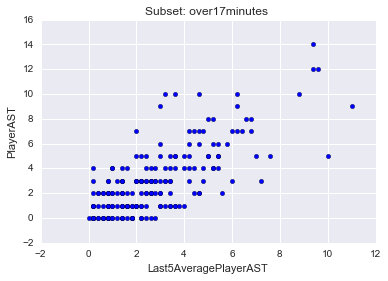

Correlation between Last10AveragePlayerAST and PlayerAST (0.70329885247313162, 0.0)
Proportion of data points that are NaN:  0.0192701728812


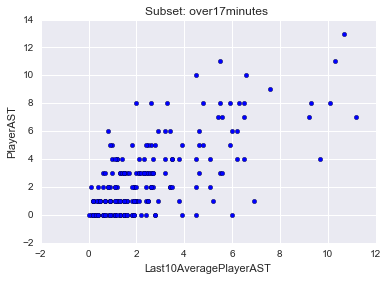

Correlation between Last20AveragePlayerAST and PlayerAST (0.70788427809763743, 0.0)
Proportion of data points that are NaN:  0.0406599904058


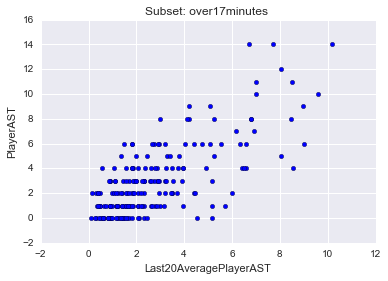

Correlation between Last25AveragePlayerAST and PlayerAST (0.70740559262596314, 0.0)
Proportion of data points that are NaN:  0.0515185208599


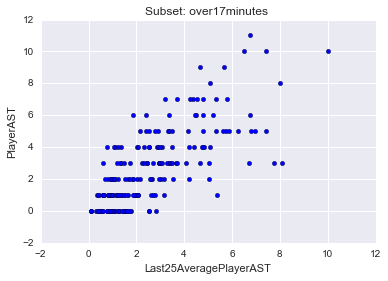

Correlation between Last5AveragePlayerMP and PlayerMP (0.63240294988230383, 0.0)
Proportion of data points that are NaN:  0.00917025208897


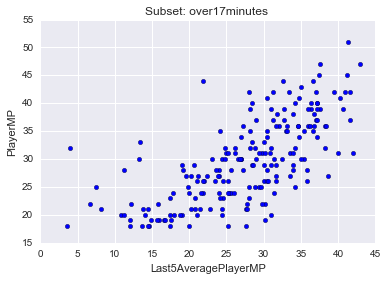

Correlation between Last10AveragePlayerMP and PlayerMP (0.62847726260533177, 0.0)
Proportion of data points that are NaN:  0.0192701728812


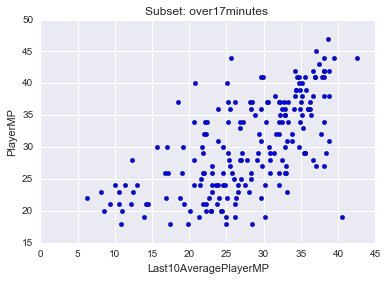

Correlation between Last20AveragePlayerMP and PlayerMP (0.61304853705931961, 0.0)
Proportion of data points that are NaN:  0.0406599904058


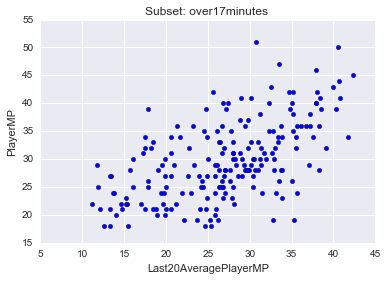

Correlation between Last25AveragePlayerMP and PlayerMP (0.60606985312924366, 0.0)
Proportion of data points that are NaN:  0.0515185208599


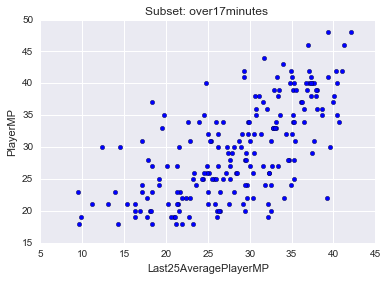

Correlation between Last5AveragePlayerPTSPerMinute and PlayerPTSPerMinute (0.45069216137386098, 0.0)
Proportion of data points that are NaN:  0.0133240118551


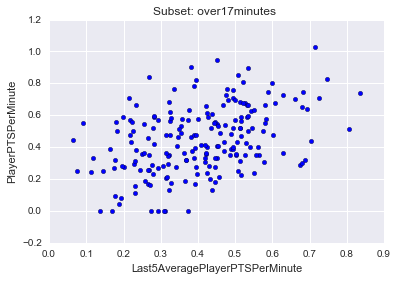

Correlation between Last10AveragePlayerPTSPerMinute and PlayerPTSPerMinute (0.48973980141277906, 0.0)
Proportion of data points that are NaN:  0.0275553803647


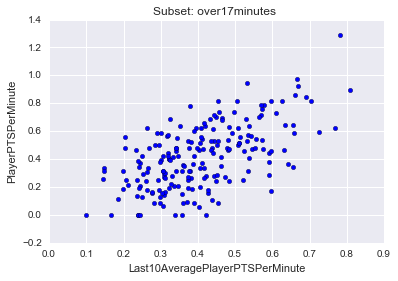

Correlation between Last20AveragePlayerPTSPerMinute and PlayerPTSPerMinute (0.50911254561721042, 0.0)
Proportion of data points that are NaN:  0.0568920059648


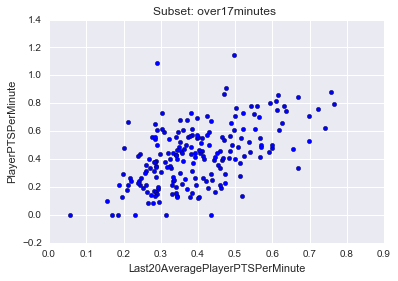

Correlation between Last25AveragePlayerPTSPerMinute and PlayerPTSPerMinute (0.5131354796226153, 0.0)
Proportion of data points that are NaN:  0.0711791545965


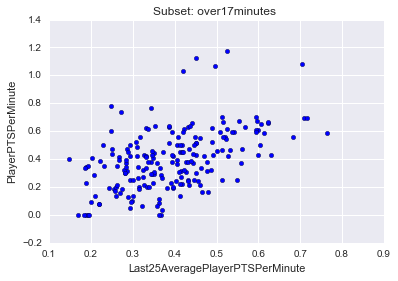

Correlation between Last5AveragePlayerSTLPerMinute and PlayerSTLPerMinute (0.17520793303768087, 0.0)
Proportion of data points that are NaN:  0.0133240118551


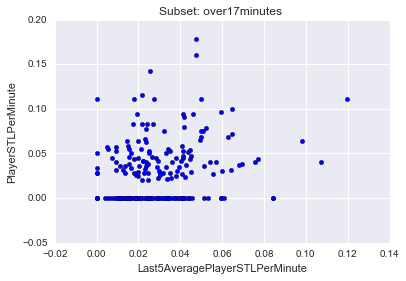

Correlation between Last10AveragePlayerSTLPerMinute and PlayerSTLPerMinute (0.21322490448328962, 0.0)
Proportion of data points that are NaN:  0.0275553803647


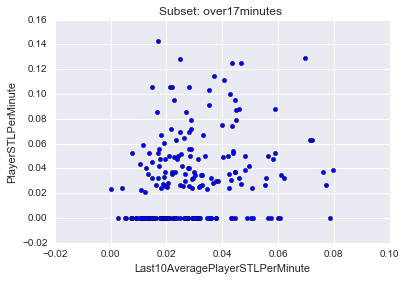

Correlation between Last20AveragePlayerSTLPerMinute and PlayerSTLPerMinute (0.24357394060868665, 0.0)
Proportion of data points that are NaN:  0.0568920059648


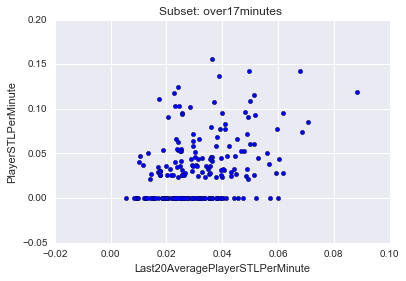

Correlation between Last25AveragePlayerSTLPerMinute and PlayerSTLPerMinute (0.25221452963477187, 0.0)
Proportion of data points that are NaN:  0.0711791545965


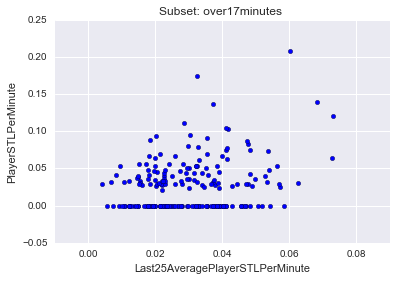

Correlation between Last5AveragePlayerSTL and PlayerSTL (0.25106339345835277, 0.0)
Proportion of data points that are NaN:  0.00917025208897


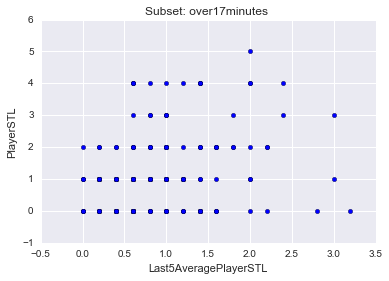

Correlation between Last10AveragePlayerSTL and PlayerSTL (0.28688220730325326, 0.0)
Proportion of data points that are NaN:  0.0192701728812


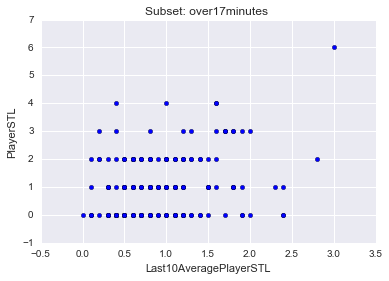

Correlation between Last20AveragePlayerSTL and PlayerSTL (0.30841186329919612, 0.0)
Proportion of data points that are NaN:  0.0406599904058


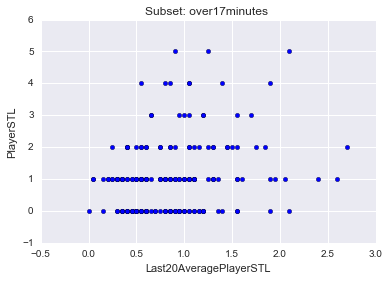

Correlation between Last25AveragePlayerSTL and PlayerSTL (0.31365400691036538, 0.0)
Proportion of data points that are NaN:  0.0515185208599


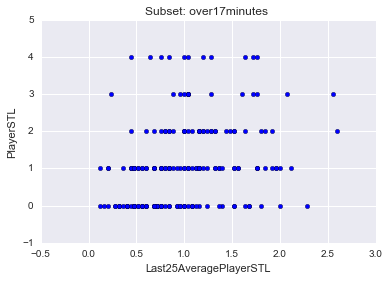

Correlation between Last5AveragePlayerASTPerMinute and PlayerASTPerMinute (0.64243988674174068, 0.0)
Proportion of data points that are NaN:  0.0133240118551


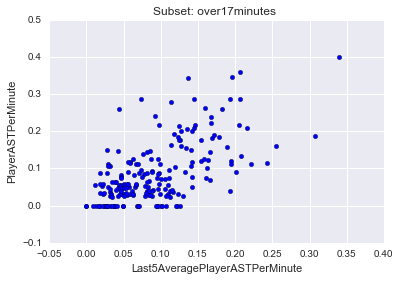

Correlation between Last10AveragePlayerASTPerMinute and PlayerASTPerMinute (0.67072392312615681, 0.0)
Proportion of data points that are NaN:  0.0275553803647


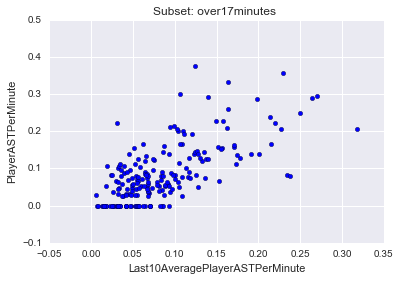

Correlation between Last20AveragePlayerASTPerMinute and PlayerASTPerMinute (0.68409778737113425, 0.0)
Proportion of data points that are NaN:  0.0568920059648


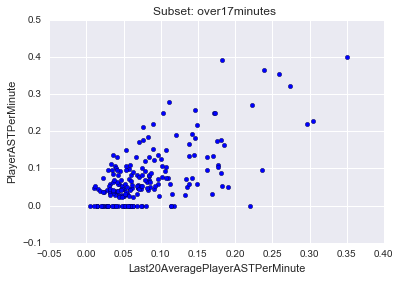

Correlation between Last25AveragePlayerASTPerMinute and PlayerASTPerMinute (0.6860754830664042, 0.0)
Proportion of data points that are NaN:  0.0711791545965


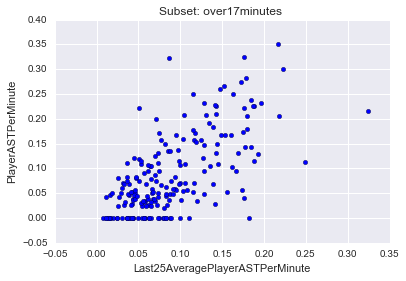

Correlation between Last5AveragePlayerBLK and PlayerBLK (0.48628973287480365, 0.0)
Proportion of data points that are NaN:  0.00917025208897


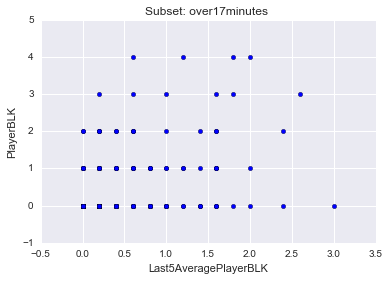

Correlation between Last10AveragePlayerBLK and PlayerBLK (0.52116180156743541, 0.0)
Proportion of data points that are NaN:  0.0192701728812


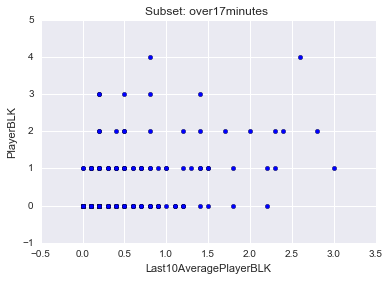

Correlation between Last20AveragePlayerBLK and PlayerBLK (0.53947478897523082, 0.0)
Proportion of data points that are NaN:  0.0406599904058


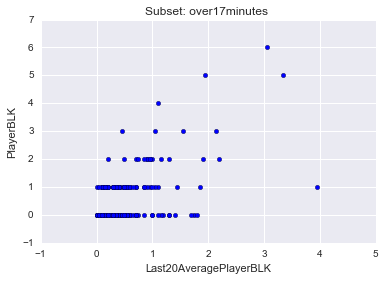

Correlation between Last25AveragePlayerBLK and PlayerBLK (0.54270441694147842, 0.0)
Proportion of data points that are NaN:  0.0515185208599


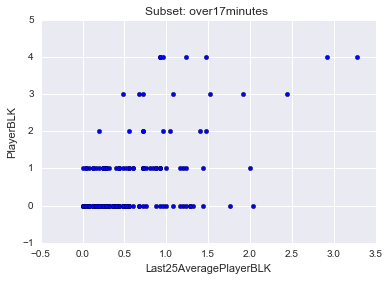

Correlation between Last5AveragePlayerTOV and PlayerTOV (0.38071182959021027, 0.0)
Proportion of data points that are NaN:  0.00917025208897


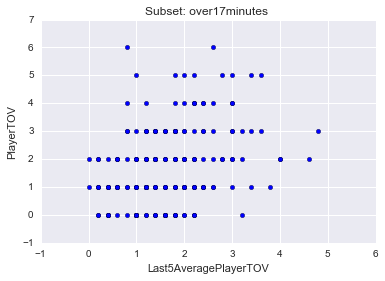

Correlation between Last10AveragePlayerTOV and PlayerTOV (0.41469929208059303, 0.0)
Proportion of data points that are NaN:  0.0192701728812


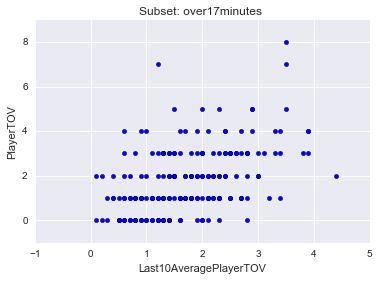

Correlation between Last20AveragePlayerTOV and PlayerTOV (0.4322315574985357, 0.0)
Proportion of data points that are NaN:  0.0406599904058


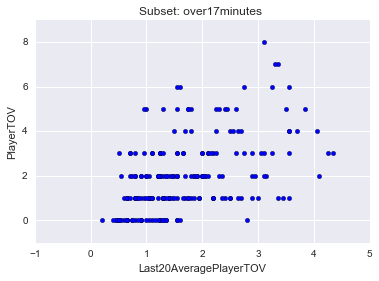

Correlation between Last25AveragePlayerTOV and PlayerTOV (0.43534081286230009, 0.0)
Proportion of data points that are NaN:  0.0515185208599


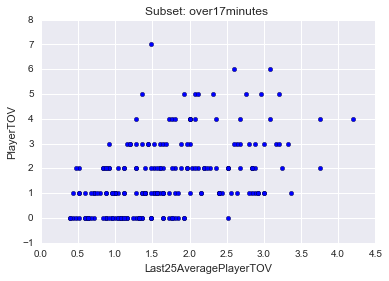

Correlation between Last5AveragePlayerORB and PlayerORB (0.49917218651438622, 0.0)
Proportion of data points that are NaN:  0.00917025208897


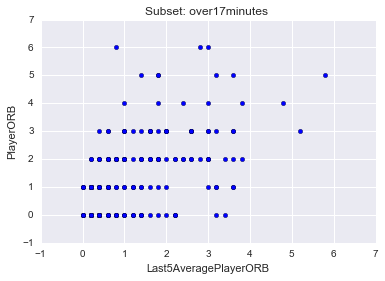

Correlation between Last10AveragePlayerORB and PlayerORB (0.53065147800278401, 0.0)
Proportion of data points that are NaN:  0.0192701728812


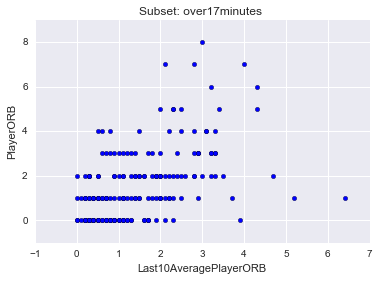

Correlation between Last20AveragePlayerORB and PlayerORB (0.54756947992528415, 0.0)
Proportion of data points that are NaN:  0.0406599904058


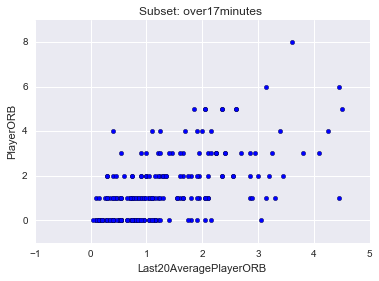

Correlation between Last25AveragePlayerORB and PlayerORB (0.54999195457636141, 0.0)
Proportion of data points that are NaN:  0.0515185208599


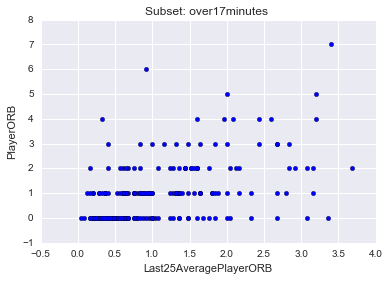

Correlation between Last5AveragePlayerDRBPerMinute and PlayerDRBPerMinute (0.49577878913172369, 0.0)
Proportion of data points that are NaN:  0.0133240118551


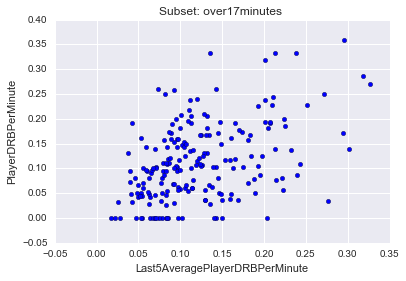

Correlation between Last10AveragePlayerDRBPerMinute and PlayerDRBPerMinute (0.53467218692177165, 0.0)
Proportion of data points that are NaN:  0.0275553803647


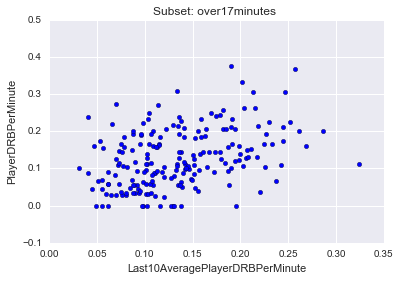

Correlation between Last20AveragePlayerDRBPerMinute and PlayerDRBPerMinute (0.55876084106527757, 0.0)
Proportion of data points that are NaN:  0.0568920059648


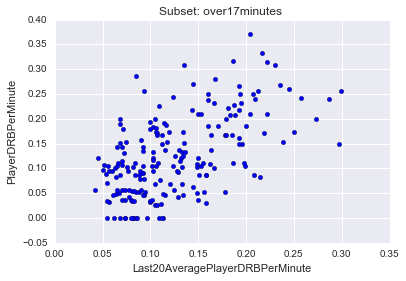

Correlation between Last25AveragePlayerDRBPerMinute and PlayerDRBPerMinute (0.56388268861146895, 0.0)
Proportion of data points that are NaN:  0.0711791545965


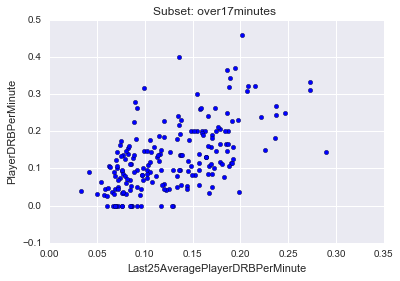

Correlation between Last5AveragePlayerTOVPerMinute and PlayerTOVPerMinute (0.21778924331514368, 0.0)
Proportion of data points that are NaN:  0.0133240118551


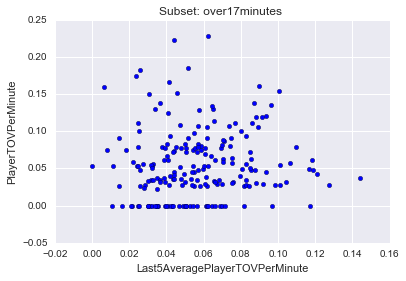

Correlation between Last10AveragePlayerTOVPerMinute and PlayerTOVPerMinute (0.26261592709362136, 0.0)
Proportion of data points that are NaN:  0.0275553803647


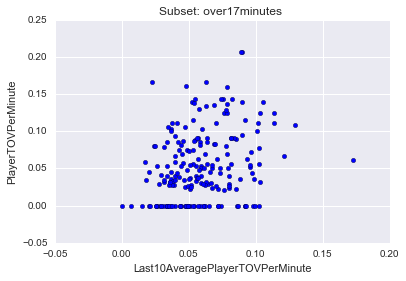

Correlation between Last20AveragePlayerTOVPerMinute and PlayerTOVPerMinute (0.29736876107547155, 0.0)
Proportion of data points that are NaN:  0.0568920059648


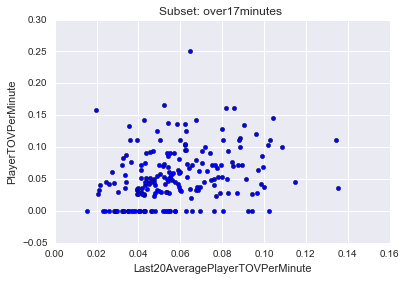

Correlation between Last25AveragePlayerTOVPerMinute and PlayerTOVPerMinute (0.30686164077607653, 0.0)
Proportion of data points that are NaN:  0.0711791545965


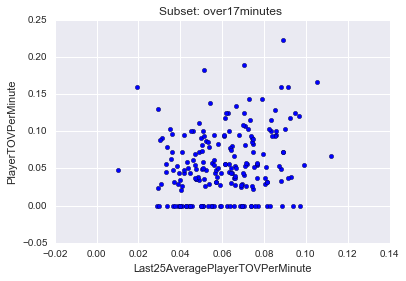

Correlation between Last5AveragePlayerBLKPerMinute and PlayerBLKPerMinute (0.46979863236174113, 0.0)
Proportion of data points that are NaN:  0.0133240118551


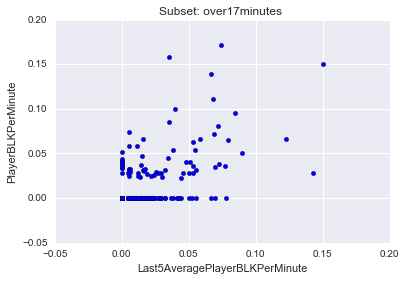

Correlation between Last10AveragePlayerBLKPerMinute and PlayerBLKPerMinute (0.51248960967629109, 0.0)
Proportion of data points that are NaN:  0.0275553803647


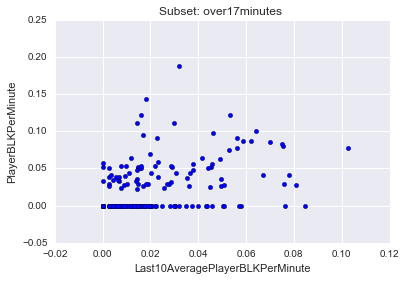

Correlation between Last20AveragePlayerBLKPerMinute and PlayerBLKPerMinute (0.53811025958892689, 0.0)
Proportion of data points that are NaN:  0.0568920059648


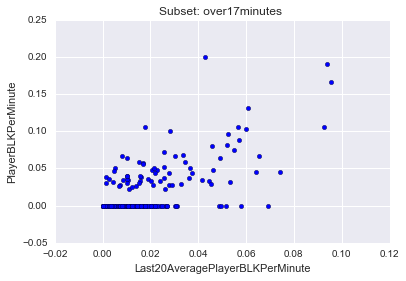

Correlation between Last25AveragePlayerBLKPerMinute and PlayerBLKPerMinute (0.54302517772247039, 0.0)
Proportion of data points that are NaN:  0.0711791545965


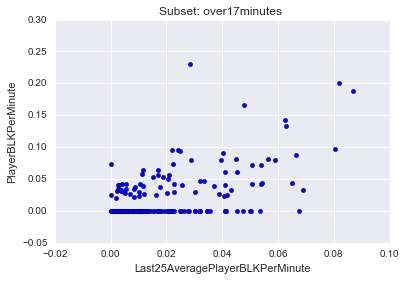

Correlation between Last5AveragePlayerDRB and PlayerDRB (0.54217308181316426, 0.0)
Proportion of data points that are NaN:  0.00917025208897


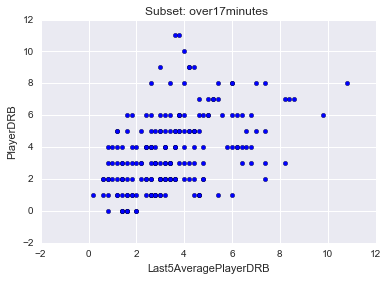

Correlation between Last10AveragePlayerDRB and PlayerDRB (0.56413894217791494, 0.0)
Proportion of data points that are NaN:  0.0192701728812


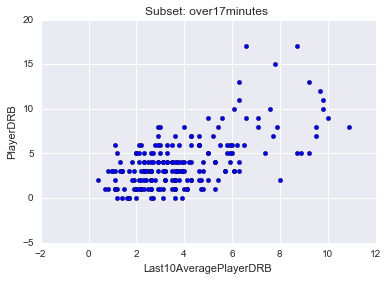

Correlation between Last20AveragePlayerDRB and PlayerDRB (0.57336559320743763, 0.0)
Proportion of data points that are NaN:  0.0406599904058


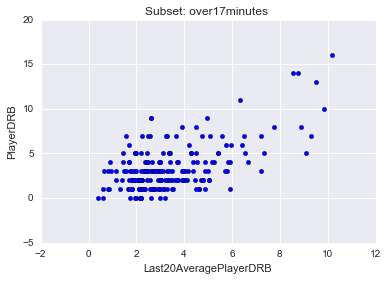

Correlation between Last25AveragePlayerDRB and PlayerDRB (0.57439225409496941, 0.0)
Proportion of data points that are NaN:  0.0515185208599


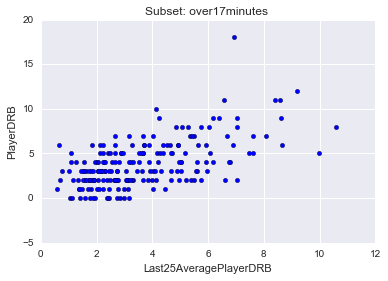

Correlation between Last5AveragePlayerPTS and PlayerPTS (0.59505249480139288, 0.0)
Proportion of data points that are NaN:  0.00917025208897


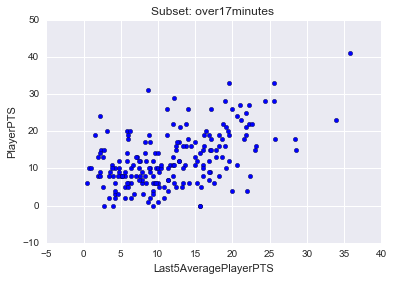

Correlation between Last10AveragePlayerPTS and PlayerPTS (0.61425242595600305, 0.0)
Proportion of data points that are NaN:  0.0192701728812


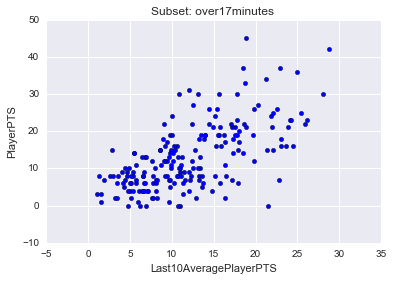

Correlation between Last20AveragePlayerPTS and PlayerPTS (0.61883755263666196, 0.0)
Proportion of data points that are NaN:  0.0406599904058


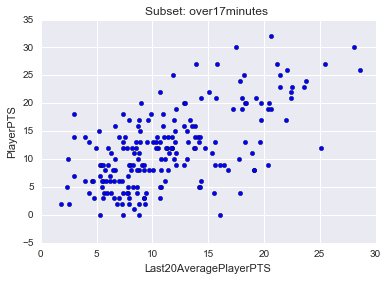

Correlation between Last25AveragePlayerPTS and PlayerPTS (0.61801612482724322, 0.0)
Proportion of data points that are NaN:  0.0515185208599


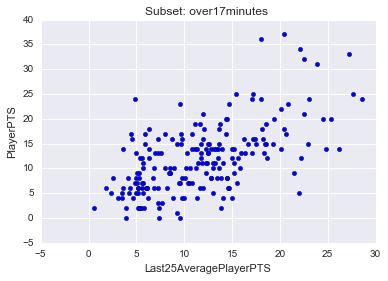

Correlation between Last5AveragePlayerORBPerMinute and PlayerORBPerMinute (0.49886485742401043, 0.0)
Proportion of data points that are NaN:  0.0133240118551


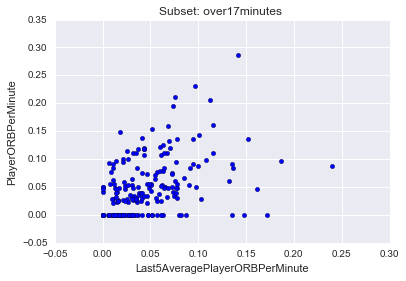

Correlation between Last10AveragePlayerORBPerMinute and PlayerORBPerMinute (0.54086860566312023, 0.0)
Proportion of data points that are NaN:  0.0275553803647


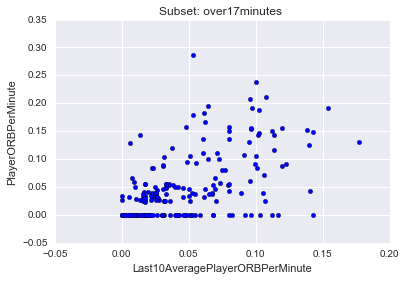

Correlation between Last20AveragePlayerORBPerMinute and PlayerORBPerMinute (0.56732513004568541, 0.0)
Proportion of data points that are NaN:  0.0568920059648


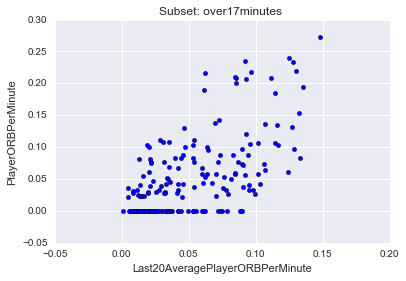

Correlation between Last25AveragePlayerORBPerMinute and PlayerORBPerMinute (0.57231833988118386, 0.0)
Proportion of data points that are NaN:  0.0711791545965


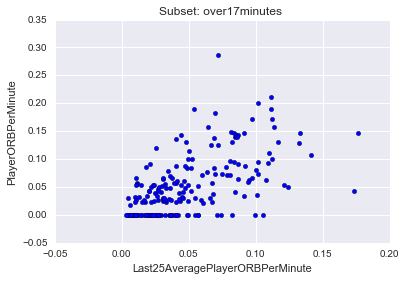

In [11]:
# Display plots for all player averages
def player_selection_function(window, key, value):
    x = 'Last' + str(window) + 'Average' + key
    y = key
    return x, y

eda_plotting(df, player_rolling_mean_stat_dict, player_selection_function, subset)

In [ ]:
# Display plots for all opponent averages
def opponent_selection_function(window, key, value):
    # Select our x and y values
    y = 'Player' + key[-3:]
    x = 'Last' + str(window) + 'Average' + key
    if len(key) > 14:
        y = 'Player' + key[10:13]
    if key[-4:] == 'Pace':
        y = 'TeamPace'
    return x, y

eda_plotting(df, opponent_rolling_mean_stat_dict, opponent_selection_function, subset)

In [ ]:
# Display plots for all team averages
def team_selection_function(window, key, value):
    y = 'Player' + key[-3:]
    x = 'Last' + str(window) + 'Average' + key
    if len(key) > 14:
        y = 'Player' + key[10:13]
    if key[-4:] == 'Pace':
        y = 'TeamPace'
    return x, y
        
eda_plotting(df, team_rolling_mean_stat_dict, team_selection_function, subset)

Correlation between EstimatedPace and TeamPace (0.48156513216735986, 0.0)
Proportion of data points that are NaN:  0.037911889719


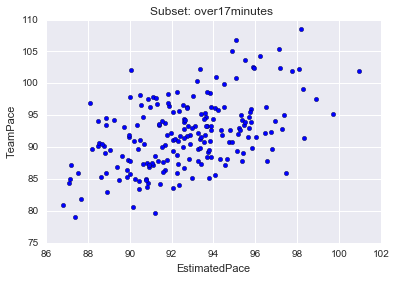

In [14]:
# Shows relationship between our linear model prediction for 'EstimatedPace' and the actual pace
x = 'EstimatedPace'
y = 'TeamPace'
scatter_plot_eda(df, x, y, subset)

Index([u'2P', u'2PA', u'3P', u'3PA', u'Age', u'ChangedTeams', u'Date', u'FG',
       u'FGA', u'FT',
       ...
       u'Last20PossessionMinuteAdjustedPlayerBLK',
       u'Last5PossessionMinuteAdjustedPlayerPTS',
       u'Last10PossessionMinuteAdjustedPlayerPTS',
       u'Last20PossessionMinuteAdjustedPlayerPTS',
       u'Last5PossessionMinuteAdjustedPlayerDRB',
       u'Last10PossessionMinuteAdjustedPlayerDRB',
       u'Last20PossessionMinuteAdjustedPlayerDRB',
       u'Last5PossessionMinuteAdjustedPlayerTOV',
       u'Last10PossessionMinuteAdjustedPlayerTOV',
       u'Last20PossessionMinuteAdjustedPlayerTOV'],
      dtype='object', length=279)
Correlation between EstimatedPlayerPossessions and PlayerAST (0.37628161549412409, 0.0)
Proportion of data points that are NaN:  0.037911889719


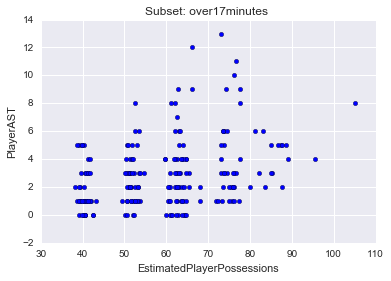

Correlation between EstimatedPlayerPossessions and PlayerMP (0.96755163537273348, 0.0)
Proportion of data points that are NaN:  0.037911889719


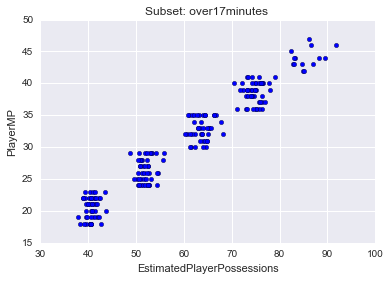

Correlation between EstimatedPlayerPossessions and PlayerPTS (0.60537016579736991, 0.0)
Proportion of data points that are NaN:  0.037911889719


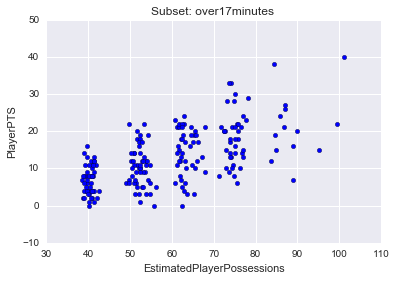

Correlation between EstimatedPlayerPossessions and PlayerDRB (0.35709661947245541, 0.0)
Proportion of data points that are NaN:  0.037911889719


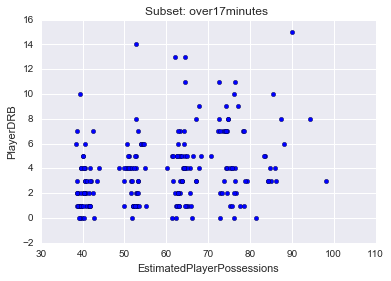

Correlation between EstimatedPlayerPossessions and PlayerORB (0.14901088764272372, 0.0)
Proportion of data points that are NaN:  0.037911889719


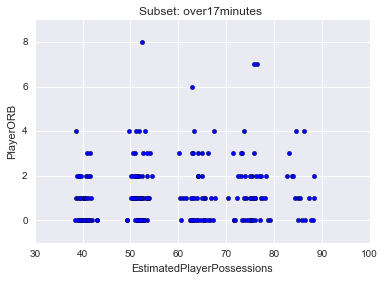

Correlation between EstimatedPlayerPossessions and PlayerTOV (0.32384008948362009, 0.0)
Proportion of data points that are NaN:  0.037911889719


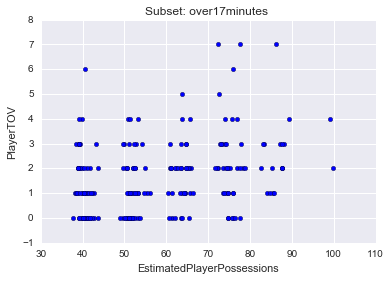

Correlation between EstimatedPlayerPossessions and PlayerSTL (0.23968710431882626, 0.0)
Proportion of data points that are NaN:  0.037911889719


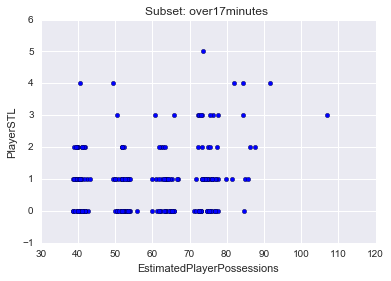

Correlation between EstimatedPlayerPossessions and PlayerBLK (0.10728723033438814, 0.0)
Proportion of data points that are NaN:  0.037911889719


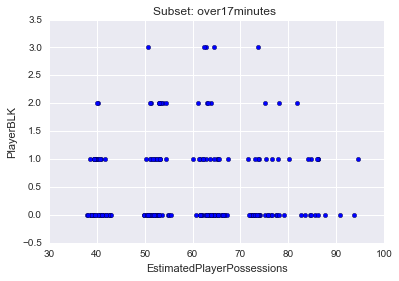

In [15]:
# Determines the optimal way to estimate the number of posssessions a player takes part in
print df.columns
for stat in main_stat_list:
    x = 'EstimatedPlayerPossessions'
    y = 'Player' + stat
    scatter_plot_eda(df, x, y, subset)

Correlation between Last10AveragePlayerPTS and PlayerPTS (0.61425242595600305, 0.0)
Proportion of data points that are NaN:  0.0192701728812


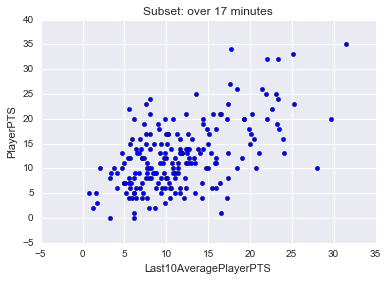

Correlation between Last10AveragePlayerPTSPerMinute and PlayerPTS (0.55830192074538887, 0.0)
Proportion of data points that are NaN:  0.0275553803647


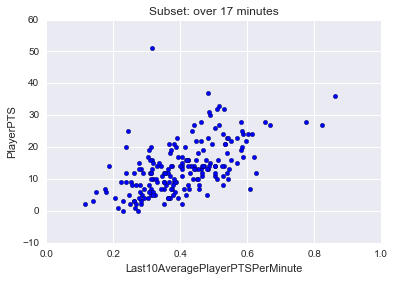

Correlation between Last20AveragePlayerPTS and PlayerPTS (0.61883755263666196, 0.0)
Proportion of data points that are NaN:  0.0406599904058


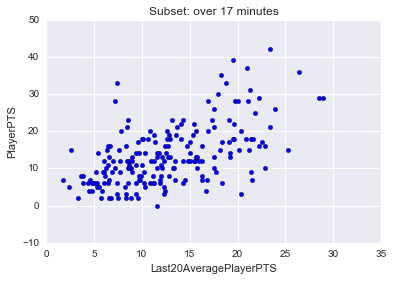

Correlation between Last20AveragePlayerPTSPerMinute and PlayerPTS (0.58036684377649672, 0.0)
Proportion of data points that are NaN:  0.0568920059648


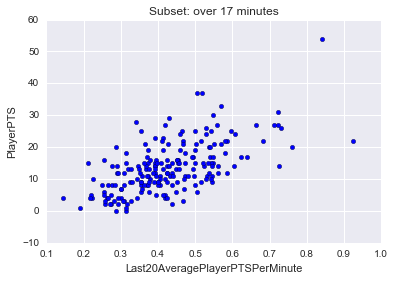

Correlation between Last25AveragePlayerPTS and PlayerPTS (0.61801612482724311, 0.0)
Proportion of data points that are NaN:  0.0515185208599


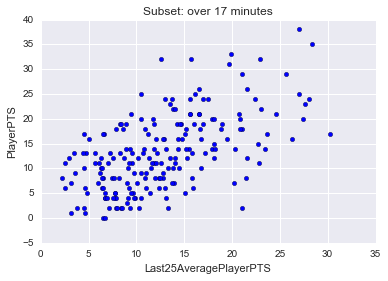

Correlation between Last25AveragePlayerPTSPerMinute and PlayerPTS (0.58443104229004206, 0.0)
Proportion of data points that are NaN:  0.0711791545965


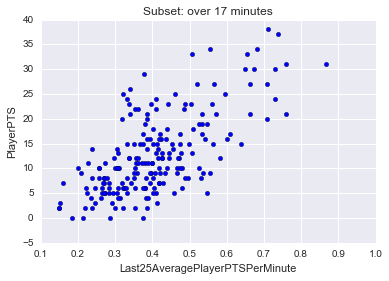

Correlation between Last5AveragePlayerPTS and PlayerPTS (0.59505249480139288, 0.0)
Proportion of data points that are NaN:  0.00917025208897


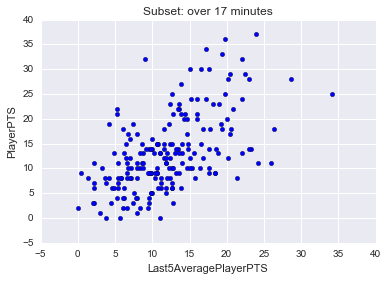

Correlation between Last5AveragePlayerPTSPerMinute and PlayerPTS (0.51422271304913469, 0.0)
Proportion of data points that are NaN:  0.0133240118551


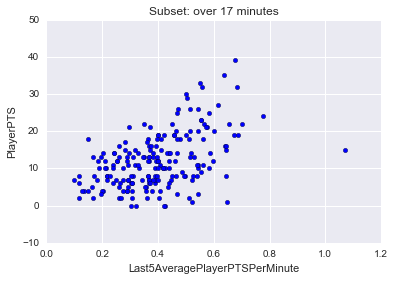

Correlation between PlayerPTS and PlayerPTS (1.0, 0.0)
Proportion of data points that are NaN:  0.0


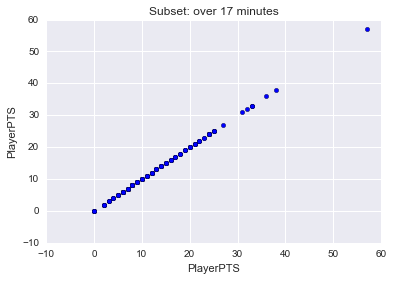

Correlation between PlayerPTSPerMinute and PlayerPTS (0.89300878055428956, 0.0)
Proportion of data points that are NaN:  0.0


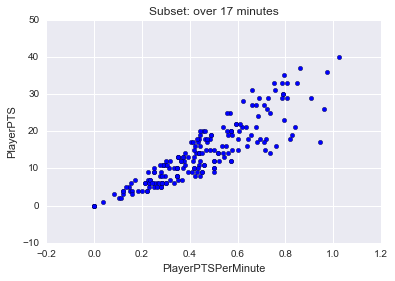

Correlation between OppPTS and PlayerPTS (0.086208077388902613, 0.0)
Proportion of data points that are NaN:  0.0


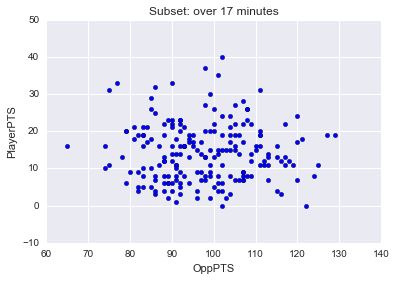

Correlation between OppAllowedPTSPerPossession and PlayerPTS (0.17729230689461969, 0.0)
Proportion of data points that are NaN:  0.0


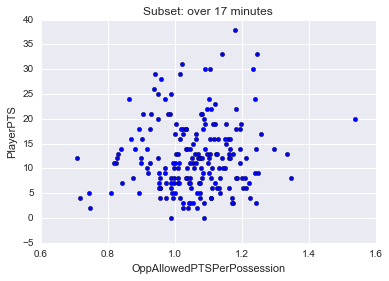

Correlation between OppAllowedPTS and PlayerPTS (0.20266407864743907, 0.0)
Proportion of data points that are NaN:  0.0


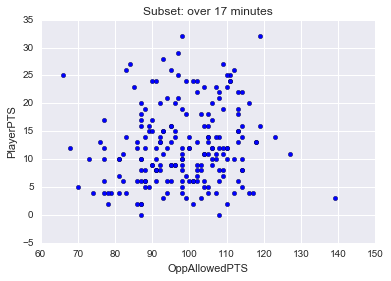

Correlation between Last5AverageOppAllowedPTSPerPossession and PlayerPTS (0.033236282153050162, 2.6995219013792782e-66)
Proportion of data points that are NaN:  0.00474131038663


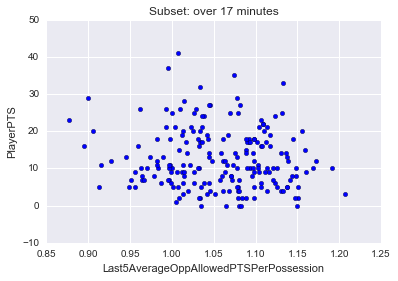

Correlation between Last10AverageOppAllowedPTSPerPossession and PlayerPTS (0.040045710251436148, 5.5245046016542132e-95)
Proportion of data points that are NaN:  0.00933387378074


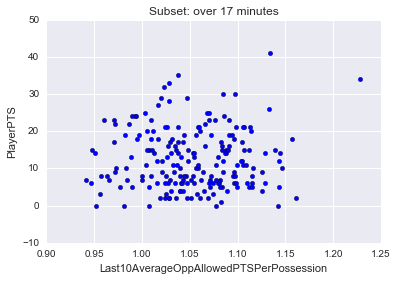

Correlation between Last20AverageOppAllowedPTSPerPossession and PlayerPTS (0.044136968081858019, 6.2483926821898798e-114)
Proportion of data points that are NaN:  0.018578499366


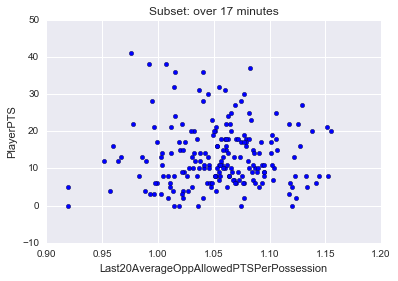

Correlation between Last5AverageOppAllowedPTS and PlayerPTS (0.046180660545258718, 2.8081558122259249e-126)
Proportion of data points that are NaN:  0.00474131038663


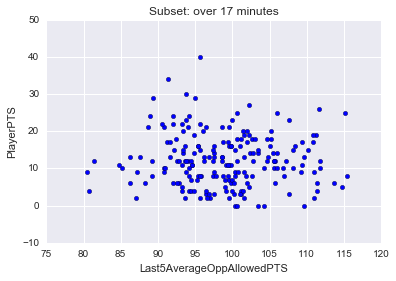

Correlation between Last10AverageOppAllowedPTS and PlayerPTS (0.051954595122340637, 1.2978447036917028e-158)
Proportion of data points that are NaN:  0.00933387378074


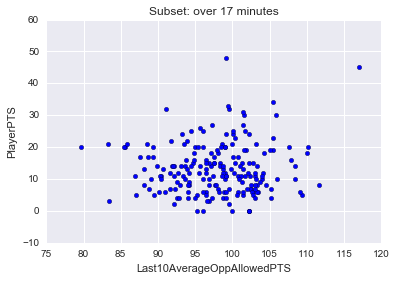

Correlation between Last20AverageOppAllowedPTS and PlayerPTS (0.054090843812294218, 3.4489309293802424e-170)
Proportion of data points that are NaN:  0.018578499366


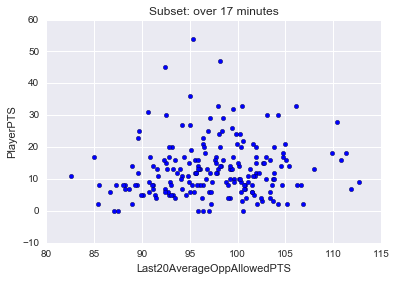

Correlation between PlayerPTSPerPossession and PlayerPTS (0.88944720539785216, 0.0)
Proportion of data points that are NaN:  0.0


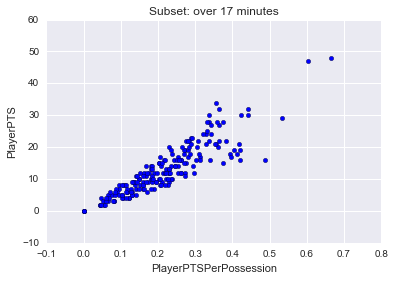

Correlation between Last5AveragePlayerPTSPerPossession and PlayerPTS (0.51341435359929133, 0.0)
Proportion of data points that are NaN:  0.0133240118551


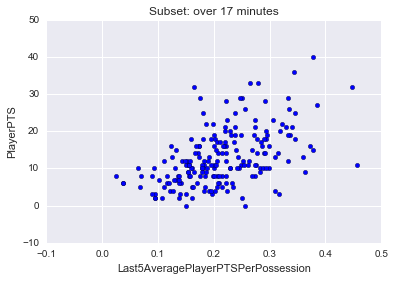

Correlation between Last10AveragePlayerPTSPerPossession and PlayerPTS (0.55785745014648691, 0.0)
Proportion of data points that are NaN:  0.0275553803647


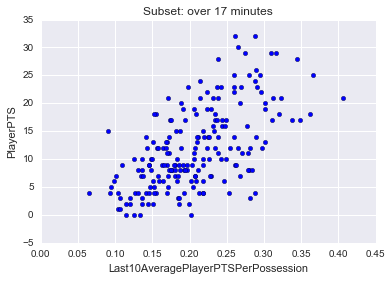

Correlation between Last20AveragePlayerPTSPerPossession and PlayerPTS (0.58020381307022884, 0.0)
Proportion of data points that are NaN:  0.0568920059648


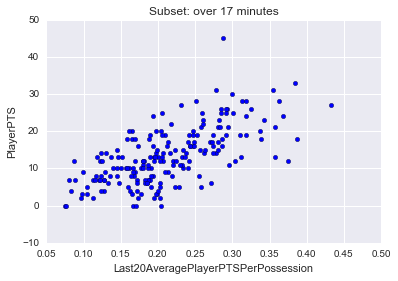

Correlation between PossessionMinuteAdjustedPlayerPTS and PlayerPTS (0.72440321021584275, 0.0)
Proportion of data points that are NaN:  0.0776868355193


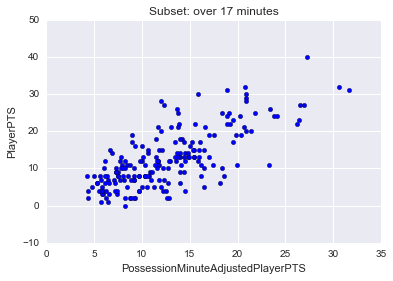

Correlation between Last5PossessionMinuteAdjustedPlayerPTS and PlayerPTS (0.68071671326795358, 0.0)
Proportion of data points that are NaN:  0.046881333368


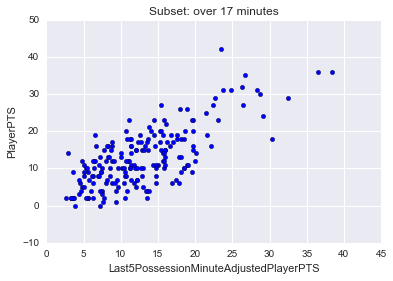

Correlation between Last10PossessionMinuteAdjustedPlayerPTS and PlayerPTS (0.70705486252388505, 0.0)
Proportion of data points that are NaN:  0.0568325071677


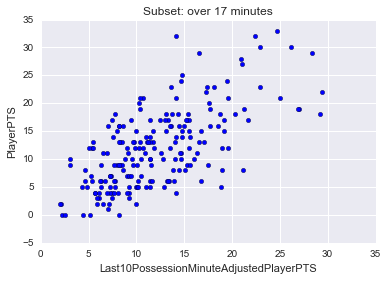

Correlation between Last20PossessionMinuteAdjustedPlayerPTS and PlayerPTS (0.71855074407200736, 0.0)
Proportion of data points that are NaN:  0.0776868355193


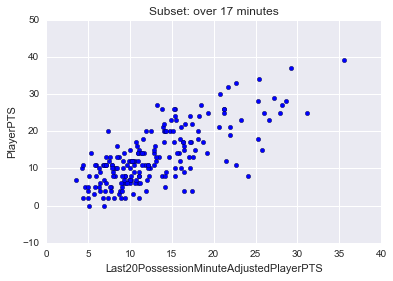

In [22]:
pts_columns = [column for column in df.columns if 'PTS' in column]
for column in pts_columns:
    x = column
    y = 'PlayerPTS'
    scatter_plot_eda(df, x, y, subset)

In [24]:
def add_position_metric(df):
	df['PosMetric'] = - df.Last10AveragePlayerAST - df['3PA'] + 2 * \
                        2 * df.Last10AveragePlayerORB

In [25]:
add_position_metric(df)

In [38]:
g = df.groupby(['Team', 'Date'])

In [39]:
df2 = g.apply(lambda x: x[x.GS == 1].sort_values(['Position', 'PosMetric']))

In [44]:
df2[df2.Team == 'GSW'][['Player', 'PosMetric', 'Pos']]

Player  PosMetric Pos
Team Date                                             
GSW  2000-10-31 198        Larry Hughes        NaN   G
                206     Mookie Blaylock        NaN   G
                199      Antawn Jamison        NaN   F
                207       Danny Fortson        NaN   F
                204       Erick Dampier        NaN   C
     2000-11-02 551     Mookie Blaylock        NaN   G
                552        Larry Hughes        NaN   G
                545      Antawn Jamison        NaN   F
                555       Danny Fortson        NaN   F
                549       Erick Dampier        NaN   C
     2000-11-04 943     Mookie Blaylock        NaN   G
                945        Larry Hughes        NaN   G
                937      Antawn Jamison        NaN   F
                939       Danny Fortson        NaN   F
                941       Erick Dampier        NaN   C
     2000-11-08 1308       Larry Hughes        NaN   G
                1313    Mookie Blaylock        NaN   G
                1310      Danny Fortson        NaN   F
                1316     Antawn Jamison        NaN   F
                1312      Erick Dampier        NaN   C
     2000-11-10 1750    Vinny Del Negro        NaN   G
                1756       Larry Hughes        NaN   G
                1751     Antawn Jamison        NaN   F
                1754      Danny Fortson        NaN   F
                1755      Erick Dampier        NaN   C
     2000-11-12 2068       Larry Hughes        NaN   G
                2071    Mookie Blaylock        NaN   G
                2070      Danny Fortson        NaN   F
                2074     Antawn Jamison        NaN   F
                2072      Erick Dampier        NaN   C
...                                 ...        ...  ..
     2016-04-01 391661     Andrew Bogut        3.9   C
     2016-04-03 391911    Stephen Curry      -16.7   G
                391906    Klay Thompson       -5.0   G
                391913   Draymond Green       -4.7   F
                391912  Harrison Barnes        0.6   F
     2016-04-05 392159    Stephen Curry      -17.2   G
                392160    Klay Thompson      -11.5   G
                392164   Draymond Green       -4.1   F
                392166  Harrison Barnes       -2.5   F
                392167     Andrew Bogut        3.4   C
     2016-04-07 392491    Stephen Curry      -10.3   G
                392492    Klay Thompson       -5.6   G
                392482  Harrison Barnes       -3.9   F
                392484   Draymond Green       -3.8   F
                392485     Andrew Bogut        3.4   C
     2016-04-09 392722    Stephen Curry      -18.4   G
                392727    Klay Thompson      -10.3   G
                392720   Draymond Green       -6.5   F
                392716  Harrison Barnes        0.7   F
                392719     Festus Ezeli        4.5   C
     2016-04-10 392998    Stephen Curry      -14.3   G
                392996    Klay Thompson       -4.0   G
                393000   Draymond Green       -4.1   F
                392999  Harrison Barnes       -1.6   F
                392993     Andrew Bogut        4.2   C
     2016-04-13 393566    Stephen Curry      -24.3   G
                393564    Klay Thompson       -9.3   G
                393571   Draymond Green       -6.1   F
                393569  Harrison Barnes       -1.6   F
                393562     Andrew Bogut        3.7   C

[6066 rows x 3 columns]